<a href="https://colab.research.google.com/github/wayaadhyasta/Studi-Kasus-Machine-Learning/blob/main/KelulusanMahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dt = pd.read_csv('/content/drive/MyDrive/Prediksi Kelulusan Mahasiswa.csv')
dt

,IPK,SKS/Semester,Organisasi,Kehadiran (%),Lulus Tepat Waktu (Label)
0,3.8,20,1,95,1
1,2.5,15,0,70,0
2,3.2,18,1,85,1
3,2.8,16,0,75,0
4,3.5,22,1,90,1


In [3]:
display(dt.info())
display(dt.describe())
display(dt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   IPK                        5 non-null      float64
 1   SKS/Semester               5 non-null      int64  
 2   Organisasi                 5 non-null      int64  
 3   Kehadiran (%)              5 non-null      int64  
 4   Lulus Tepat Waktu (Label)  5 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 332.0 bytes


None

,IPK,SKS/Semester,Organisasi,Kehadiran (%),Lulus Tepat Waktu (Label)
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.160000,18.200000,0.600000,83.000000,0.600000
std,0.522494,2.863564,0.547723,10.368221,0.547723
min,2.500000,15.000000,0.000000,70.000000,0.000000
25%,2.800000,16.000000,0.000000,75.000000,0.000000
50%,3.200000,18.000000,1.000000,85.000000,1.000000
75%,3.500000,20.000000,1.000000,90.000000,1.000000
max,3.800000,22.000000,1.000000,95.000000,1.000000


,IPK,SKS/Semester,Organisasi,Kehadiran (%),Lulus Tepat Waktu (Label)
0,3.8,20,1,95,1
1,2.5,15,0,70,0
2,3.2,18,1,85,1
3,2.8,16,0,75,0
4,3.5,22,1,90,1


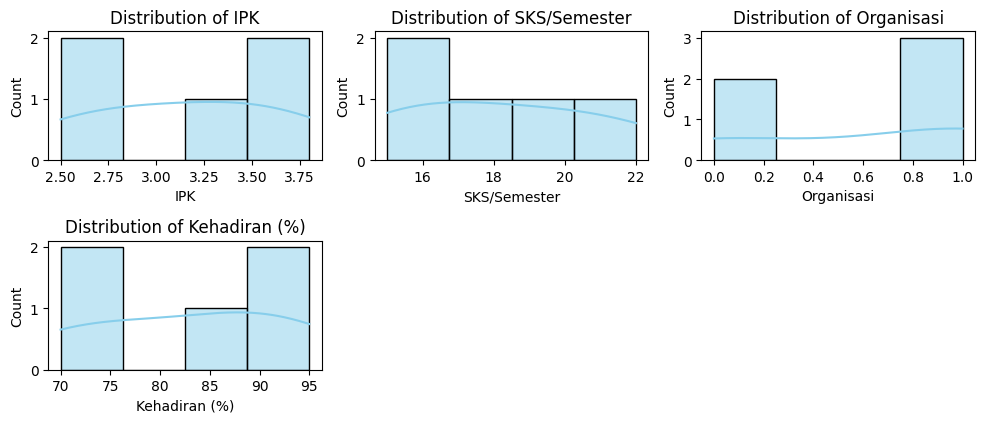

In [11]:
plt.figure(figsize=(10,6))
for i, col in enumerate(dt.columns[:-1]):
    plt.subplot(3,3, i+1)
    sns.histplot(dt[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-13-1953b6b04199>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dt.iloc[:,-1], palette='Set2')


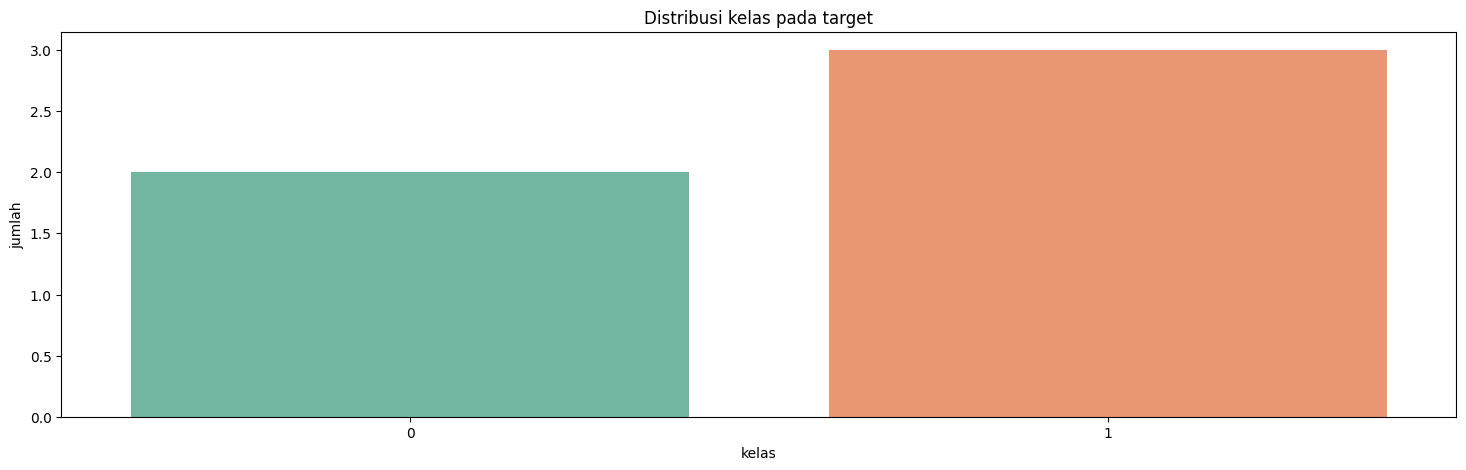

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(x=dt.iloc[:,-1], palette='Set2')
plt.title('Distribusi kelas pada target')
plt.xlabel('kelas')
plt.ylabel('jumlah')
plt.show()

In [14]:
dt = dt.dropna()

In [15]:
x = dt.iloc[:, :-1]
y = dt.iloc[:, -1]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [17]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
lr_preds = lr_model.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_preds)
print('Logistic Regression Accuracy:', lr_accuracy)
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

